# ARIMA Models
**A**uto**r**egressive **I**ntegrated **M**oving **A**verage

**Zadanie** - *forecasting*, po naszemu predyckja w szeregach czasowych, tzn. mając danych ciąg ${x_n}$ obserwacji chcemy przewidzieć $x_{n+1}, x_{n+2}, x_{n+3}, ...$ 

Meta-rodzina modeli ARIMA są określane często przez 3 cyfry $ ARIMA(p, d, q) $

* **p** - ilość składników *autoregresyjnych*
* **d** - ilość składników *różnicowych* (?)
* **q** - ilośc składników *opóźnionych błedów*




### ARIMA(1,0,0) with constant - first-order autoregressive model 

Dla stacjonarnego i autoskorelowanego (kolejne wartości zależą od poprzednich) szeregu być może jesteśmy w stanie przewidzieć kolejne wartości jako iloczyn poprzedniej wartości plus stała

\begin{equation}
    \hat{x}_t = \mu + \phi_1 x_{t-1}
\end{equation}

* $\mu$ i $\phi_1$ to parametry modelu, jeśli szereg ma średnio 0 to $\mu$ nie jest potrzebne.
* dla $ARIMA(2,0,0)$ mielibyśmy $\hat{x}_t = \mu + \phi_1 x_{t-1} + \phi_2 x_{t-2} $ itd.



### ARIMA(0,1,0) - random walk
Jeśli szereg nie jest stacjonarny najprostszym modelem jaki możemy używać jest *random walk*. Zakładamy, że różnica pomiędzy kolejnymi obserwacjami jest stała i ją staramy się przewidzieć

\begin{equation}
    \hat{x}_t - x_{t-1} = \mu
\end{equation}

lub inaczej do przewidywanie kolejnej wartości

\begin{equation}
    \hat{x}_t = \mu + x_{t-1}
\end{equation}

* gdzie $\mu$ jest średnią różnicą pomiędzy obserwacjami
* UWAGA: dla d=2 czyli *drugiej różnicy* to nie jest $x_t - x_{t-2}$ tylko *pierwsza różnica pierwszej różnicy*, czyli $(x_t - x_{t-1}) - (x_{t-1} - x_{t-2})$

### ARIMA(0,0,q) - moving average
Zwyczajna średnia ruchoma

\begin{equation}
    \hat{x}_t = \frac{1}{q} \sum_{i=1}^{q} x_{t-i}
\end{equation}

### ARIMA(1,1,0) differenced first-order autoregressive mode
Rozszerzając poprzedni model może stwierdzieć, że różnice pomiędzy kolejnymi obserwacjami są ze sobą skorelowane, wtedy podobnie jak w przypadku modelu ARIMA(1,0,0) może użyć autoregresji na tych różnicach

\begin{equation}
    \hat{x}_t - x_{t-1} = \mu + \phi_1(x_{t-1} - x_{t-2})
\end{equation}

Przerzucając na prawą stronę mamy

\begin{equation}
    \hat{x}_t = \mu + x_{t-1} + \phi_1(x_{t-1} - x_{t-2})
\end{equation}

### ARIMA(0,1,1) without constant - simple exponential smoothing
Inną metodą jest tzw. simple exponential smoothing czyli poprawianie kolejnej predykcji poprzez "kierowanie" jej w stronę błędu poprzedniej

\begin{equation}
    \hat{x}_t = \hat{x}_{t-1} + \alpha (x_{t-1} - \hat{x}_{t-1})
\end{equation}

* oznaczamy $e_{t-1} = (x_{t-1} - \hat{x}_{t-1})$
* zazwyczaj stosuje się wzór po przekształceniach:

\begin{equation}
    \hat{x}_t = x_{t-1} - (1 - \alpha) e_{t-1} \\
    \hat{x}_t = x_{t-1} - \theta e_{t-1}
\end{equation}


### ARIMA(1,1,2)
Połączmy to w jeden przykładowy model

\begin{equation}
    \hat{x}_t = x_{t-1} +  \phi_1(x_{t-1} - x_{t-2}) - \theta_1 e_{t-1} - \theta_2 e_{t-2}
\end{equation}

Dla bardziej skomplikowanych kombinacji bardziej czytelna jest tzw. notacja *backshift*



$$ (1 - \phi_1 B - \ldots - \phi_p B^p) \hspace{15pt} (1 - B)^d x_t \hspace{15pt} = \hspace{15pt} \mu + (1 + \theta_1 B + \ldots + \theta_q B^q)e_t $$
$ \hspace{150pt} \uparrow \hspace{70pt} \uparrow \hspace{100pt} \uparrow  $
$ \hspace{145pt} AR(p) \hspace{50pt} d \hspace{3pt} \text{różnic} \hspace{80pt} MA(q)  $

* gdzie $B$ operator *backshift*, czyli $Bx_t = x_{t-1}$, $B^2 x_t = x_{t-2}$, itd.

Wszystkie parametry modelu $\mu, \phi_1, \ldots, \phi_p, \theta_1, \ldots, \theta_q$ znajduję się za pomocą MLE

# Część praktyczna! woooohoooo

In [18]:
%matplotlib inline

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = (13,6)

### Data
Weźmy dane ilości pasażerów linii lotniczych w latach 1949-1960 (pewnie amerykańskich)

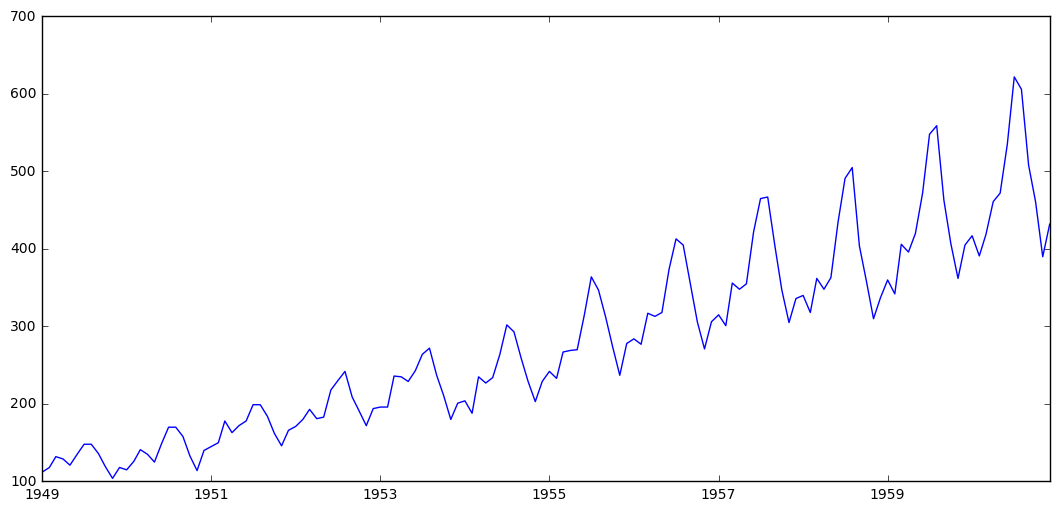

In [31]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', index_col='Month',date_parser=dateparse)
ts = data['#Passengers']

plt.plot(ts)

Wyraźnie widać tutaj trend, często stosuje się różne transformacje czy nawet dekompozycje. Dla prostoty użyję tutaj logarytmu

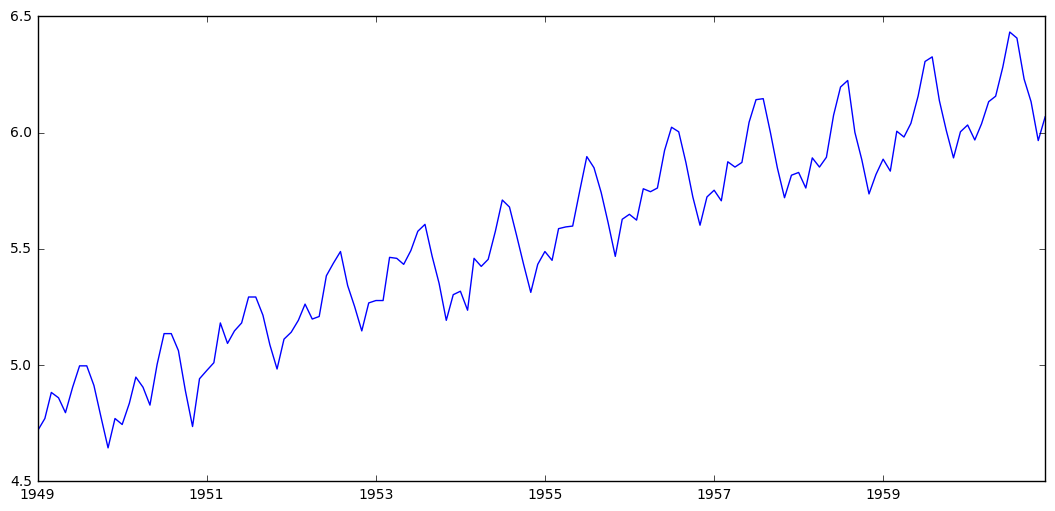

In [33]:
ts_log = np.log(ts)
plt.plot(ts_log)

### Wybór rodziny modeli
Wartość **d** jest najczęściej ustawiana na 1 - to już pozwala nam walczyć z niestacjonarnością 

Ponieważ będziemy działać na *pierwszych różnicach* dla wizualizacji policzmy sobie różnice

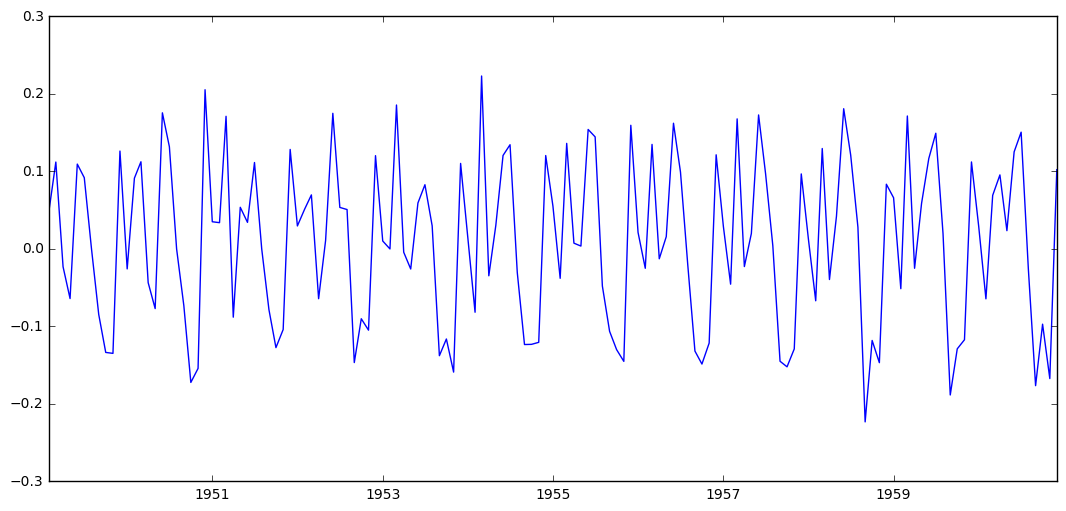

In [37]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
plt.plot(ts_log_diff)

**Pytanie:** Jak wybrać parametry **p** i **q** do naszego modelu?
**Odpowiedź:** **ACF** i **PACF**

**ACF** - Autocorrelation Function, funkcja mierząca korelacje pomiędzy szeregiem, a jego "cofniętą" wersja <br>
**PACF** - Partial Autocorrelation Function, jw. tylko usuwamy pośrednie korelacje, czyli dla szeregu cofniętego o 5, wartość PACF zwróci korelacje z usuniętymi korelacjami pomiędzy cofnięciami o 1-4

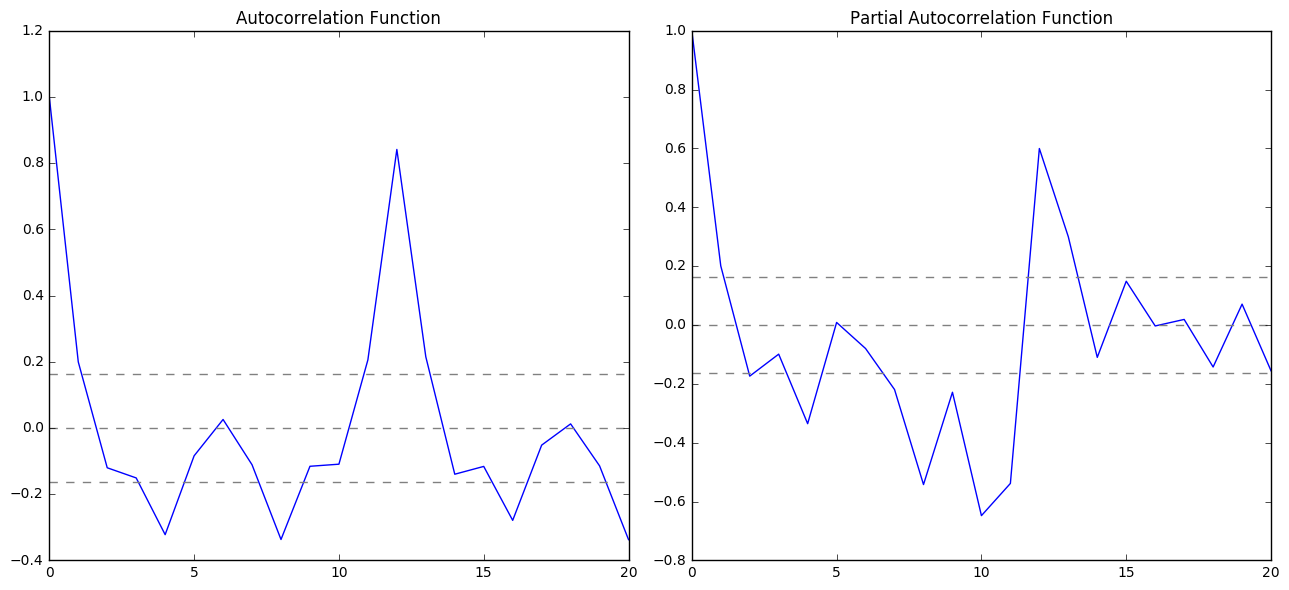

In [42]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

* **p** - wybieramy pierwszą wartość opóźnienia jaka przekracza górną granice pewności na wykresie **PACF**, w tym wypadku $p=2$
* **q** - analocznie dla **ACF**, w tym wypadku również $q=2$

Wypróbujemy 2 modele **AR** i **MA** następnie je połączymy

In [43]:
from statsmodels.tsa.arima_model import ARIMA

### Model AR

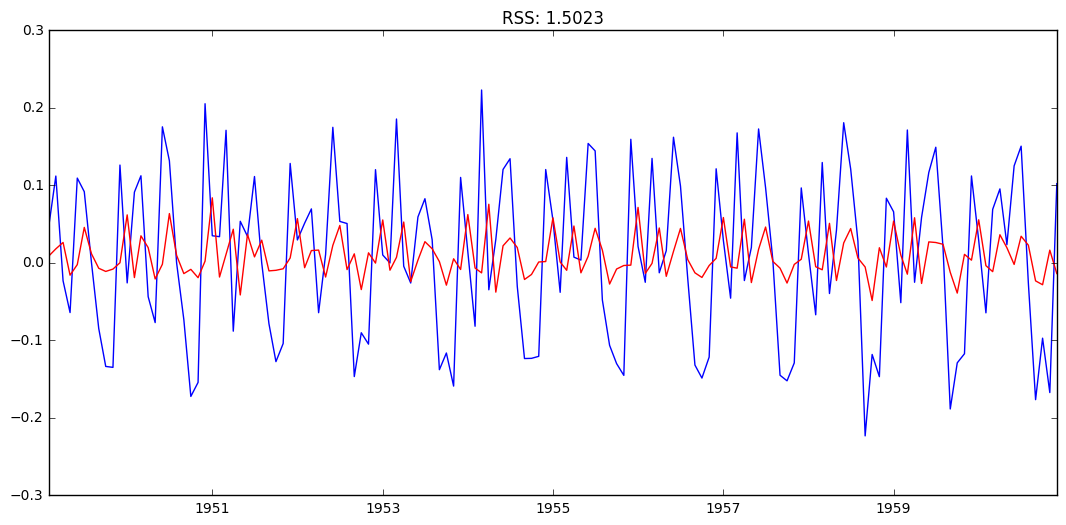

In [53]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.sum((results_AR.fittedvalues - ts_log_diff)**2))

### Model MA

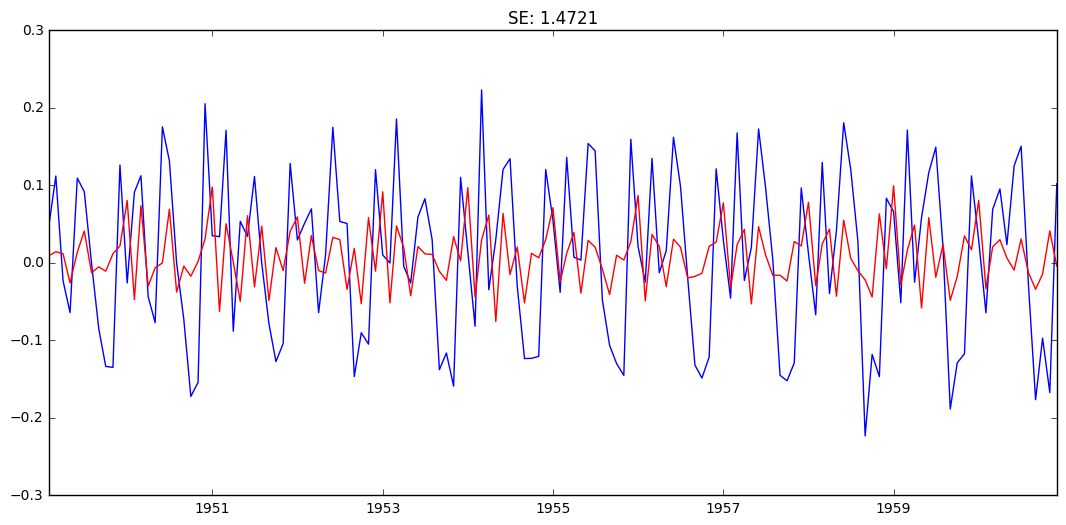

In [49]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.sum((results_MA.fittedvalues-ts_log_diff)**2))

### Połączone modele

/home/sieradzki/miniconda2/envs/chem/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


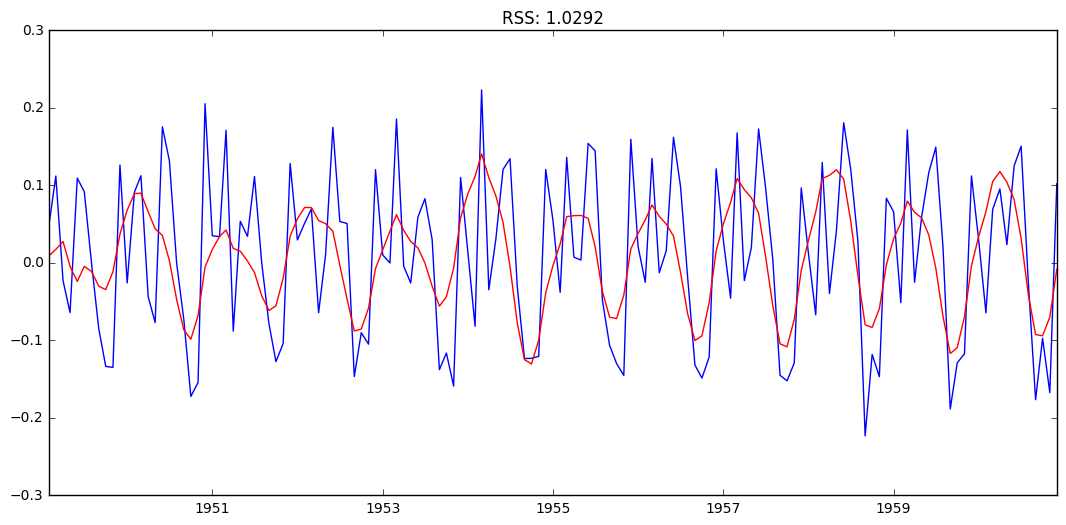

In [55]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Mieliśmy przewidywać wartości
Wróćmy do wartości aby ostatecznie zwizualizować wynik 

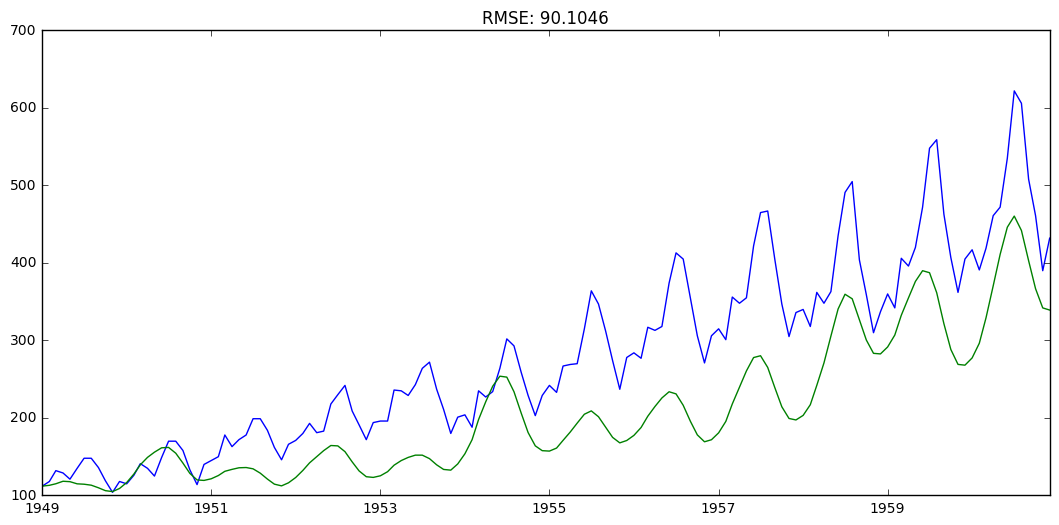

In [52]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))